In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


dirs = os.listdir('val/')
for dir in dirs:
    if os.path.isdir('val/' + dir):
        files = list(os.listdir('val/' + dir))
        print(dir + ' folder has ' + str(len(files)) + ' images')


base_val_dir = 'val/'
base_train_dir = 'train/'
img_size = 180
batch = 32


train_ds = tf.keras.utils.image_dataset_from_directory(base_train_dir, seed=123, validation_split=0.2, subset='training', batch_size=batch, image_size=(img_size, img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_val_dir, seed=123, validation_split=0.2, subset='validation', batch_size=batch, image_size=(img_size, img_size))


flower_names = train_ds.class_names
print(flower_names)

calendula folder has 7 images
bellflower folder has 7 images
iris folder has 7 images
astilbe folder has 7 images
common_daisy folder has 7 images
california_poppy folder has 7 images
carnation folder has 7 images
rose folder has 7 images
tulip folder has 7 images
black_eyed_susan folder has 7 images
coreopsis folder has 7 images
dandelion folder has 7 images
water_lily folder has 7 images
sunflower folder has 7 images
Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 98 files belonging to 14 classes.
Using 19 files for validation.
['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


2024-05-14 10:10:04.001321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


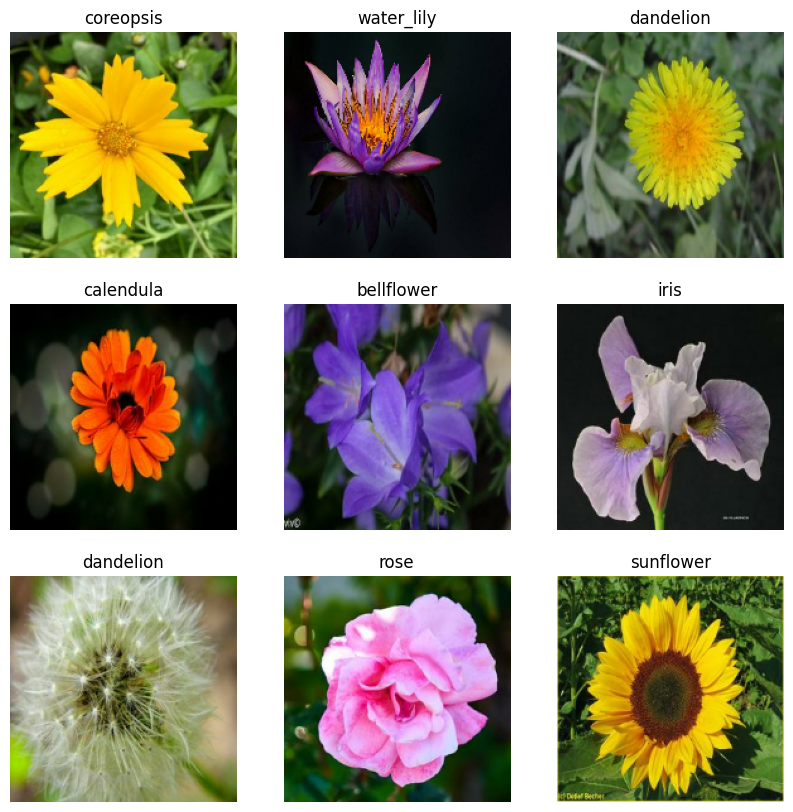

In [19]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')
plt.show()


In [17]:

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))  
])


model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,446 (15.22 MB)

 Trainable params: 3,990,446 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

model.save('Flower_model.h5')


Epoch 1/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.3127 - loss: 2.0536 - val_accuracy: 0.4211 - val_loss: 1.7050
Epoch 2/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 55s 160ms/step - accuracy: 0.5720 - loss: 1.2464 - val_accuracy: 0.5789 - val_loss: 1.4541
Epoch 3/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 55s 162ms/step - accuracy: 0.7079 - loss: 0.8780 - val_accuracy: 0.5263 - val_loss: 1.4506
Epoch 4/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 56s 162ms/step - accuracy: 0.7984 - loss: 0.5922 - val_accuracy: 0.6316 - val_loss: 1.3431
Epoch 5/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 56s 164ms/step - accuracy: 0.8902 - loss: 0.3396 - val_accuracy: 0.6316 - val_loss: 1.4622
Epoch 6/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 57s 167ms/step - accuracy: 0.9297 - loss: 0.2069 - val_accuracy: 0.7368 - val_loss: 1.5346
Epoch 7/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 57s 166ms/step - accuracy: 0.9478 - loss: 0.1531 - val_accuracy: 0.6316 - val_loss: 1.5923
Epoch 8/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 58s 169ms/step - accuracy: 0.9477 - loss: 0

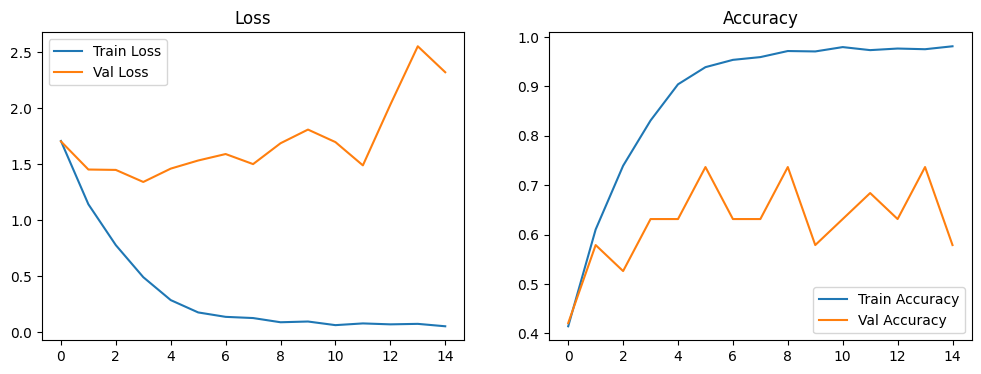

In [12]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [14]:

loaded_model = load_model('Flower_model.h5')


def classify_images(image_path, model, img_size, flower_names):
    input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = np.expand_dims(input_image_array, axis=0)

    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)]
    return outcome


result = classify_images('val/tulip/4530217118_a281de17df_c.jpg', loaded_model, img_size, flower_names)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Image belongs to tulip
